<a href="https://colab.research.google.com/github/sergicalsix/understand_LLM/blob/main/Cohere%E3%83%88%E3%83%BC%E3%82%AF%E3%83%8A%E3%82%A4%E3%82%B6%E3%83%BC%E7%90%86%E8%A7%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U transformers
!huggingface-cli login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (per

In [1]:
text = """日本国民は、正当に選挙された国会における代表者を通じて行動し、われらとわれらの子孫のために、諸国民との協和による成果と、わが国全土にわたつて自由のもたらす恵沢を確保し、政府の行為によつて再び戦争の惨禍が起ることのないやうにすることを決意し、ここに主権が国民に存することを宣言し、この憲法を確定する。そもそも国政は、国民の厳粛な信託によるものであつて、その権威は国民に由来し、その権力は国民の代表者がこれを行使し、その福利は国民がこれを享受する。これは人類普遍の原理であり、この憲法は、かかる原理に基くものである。われらは、これに反する一切の憲法、法令及び詔勅を排除する。
日本国民は、恒久の平和を念願し、人間相互の関係を支配する崇高な理想を深く自覚するのであつて、平和を愛する諸国民の公正と信義に信頼して、われらの安全と生存を保持しようと決意した。われらは、平和を維持し、専制と隷従、圧迫と偏狭を地上から永遠に除去しようと努めてゐる国際社会において、名誉ある地位を占めたいと思ふ。われらは、全世界の国民が、ひとしく恐怖と欠乏から免かれ、平和のうちに生存する権利を有することを確認する。
われらは、いづれの国家も、自国のことのみに専念して他国を無視してはならないのであつて、政治道徳の法則は、普遍的なものであり、この法則に従ふことは、自国の主権を維持し、他国と対等関係に立たうとする各国の責務であると信ずる。
日本国民は、国家の名誉にかけ、全力をあげてこの崇高な理想と目的を達成することを誓ふ。"""
text = text.replace('\n','')
text

'日本国民は、正当に選挙された国会における代表者を通じて行動し、われらとわれらの子孫のために、諸国民との協和による成果と、わが国全土にわたつて自由のもたらす恵沢を確保し、政府の行為によつて再び戦争の惨禍が起ることのないやうにすることを決意し、ここに主権が国民に存することを宣言し、この憲法を確定する。そもそも国政は、国民の厳粛な信託によるものであつて、その権威は国民に由来し、その権力は国民の代表者がこれを行使し、その福利は国民がこれを享受する。これは人類普遍の原理であり、この憲法は、かかる原理に基くものである。われらは、これに反する一切の憲法、法令及び詔勅を排除する。日本国民は、恒久の平和を念願し、人間相互の関係を支配する崇高な理想を深く自覚するのであつて、平和を愛する諸国民の公正と信義に信頼して、われらの安全と生存を保持しようと決意した。われらは、平和を維持し、専制と隷従、圧迫と偏狭を地上から永遠に除去しようと努めてゐる国際社会において、名誉ある地位を占めたいと思ふ。われらは、全世界の国民が、ひとしく恐怖と欠乏から免かれ、平和のうちに生存する権利を有することを確認する。われらは、いづれの国家も、自国のことのみに専念して他国を無視してはならないのであつて、政治道徳の法則は、普遍的なものであり、この法則に従ふことは、自国の主権を維持し、他国と対等関係に立たうとする各国の責務であると信ずる。日本国民は、国家の名誉にかけ、全力をあげてこの崇高な理想と目的を達成することを誓ふ。'

In [4]:
from transformers import AutoTokenizer

# llama2
tokenizer_llama2 = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-chat-hf")

# 日本語LLM
tokenizer_elyza = AutoTokenizer.from_pretrained("elyza/ELYZA-japanese-Llama-2-7b-fast-instruct")
tokenizer_llmjp = AutoTokenizer.from_pretrained("llm-jp/llm-jp-13b-v1.0")

# cohere
tokenizer_aya = AutoTokenizer.from_pretrained("CohereForAI/aya-101")
tokenizer_commandr = AutoTokenizer.from_pretrained("CohereForAI/c4ai-command-r-plus")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.17M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.25M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/331 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/833 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
tokenizer_llama2.vocab_size, tokenizer_elyza.vocab_size, tokenizer_llmjp.vocab_size, tokenizer_aya.vocab_size, tokenizer_commandr.vocab_size

(32000, 45043, 50570, 250100, 255000)

In [5]:
def print_token_count(text, tokenizer):
  input_ids = tokenizer(text)['input_ids']
  print(f"### {tokenizer.name_or_path}\nトークンサイズ: {len(input_ids)}")

def print_decoded_tokens(text, tokenizer):
  input_ids = tokenizer(text)['input_ids']
  print(f"### {tokenizer.name_or_path}\n{[tokenizer.decode(id) for id in input_ids]}")

In [6]:
print_token_count(text, tokenizer_llama2)
print_token_count(text, tokenizer_elyza)
print_token_count(text, tokenizer_llmjp)
print_token_count(text, tokenizer_aya)
print_token_count(text, tokenizer_commandr)

### meta-llama/Llama-2-7b-chat-hf
トークンサイズ: 809
### elyza/ELYZA-japanese-Llama-2-7b-fast-instruct
トークンサイズ: 474
### llm-jp/llm-jp-13b-v1.0
トークンサイズ: 434
### CohereForAI/aya-101
トークンサイズ: 393
### CohereForAI/c4ai-command-r-plus
トークンサイズ: 410


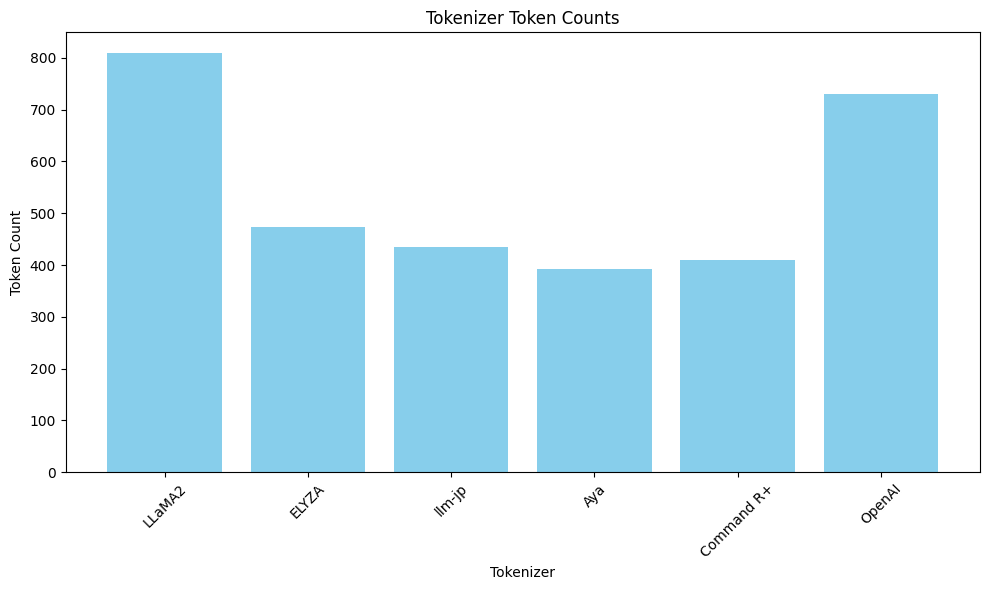

In [11]:

import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Data preparation
tokenizer_names = ['LLaMA2', 'ELYZA', 'llm-jp', 'Aya', 'Command R+', 'OpenAI']
token_counts = [809, 474, 434, 393, 410, 731]

# Matplotlib visualization
plt.figure(figsize=(10, 6))
plt.bar(tokenizer_names, token_counts, color='skyblue')
plt.xlabel('Tokenizer')
plt.ylabel('Token Count')
plt.title('Tokenizer Token Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotly visualization
fig = go.Figure([go.Bar(x=tokenizer_names, y=token_counts)])
fig.update_layout(title_text='Tokenizer Token Counts',
                  xaxis_title='Tokenizer',
                  yaxis_title='Token Count')
fig.show()

